## Notes about this template

1. This Jupyter Notebook is a template that must be used for A1, as it is aligned with the grading criteria. Not following this template may have an impact on the grade. Please follow all the instructions included here. 
2. The appendix with the answers to the Data Ethics Decision Aid is to be handed in on a separate Canvas assignment, and in Word or PDF (not Jupyter notebook). See instructions on Canvas.

# Title of the Assignment

* Student Name: Xiangjun Shi
* Student Number: 12180335
* Date: March/25th/2023
* Wordcount per section:
  * Introduction: 224 words
  * Hypotheses & Sub-RQs: 449 words
  * Gathering data: 282 words
  * Data Exploration & Evaluation: 433 words
  * Evaluation: 496 words
  * Limitations and Next Steps: 448 words
  * Ethical and Normative Considerations:303 words

## Introduction 

**Doing data analysis is not just about crunching the numbers, but also explaining what is being done, and why. Moreover, it is important to document your steps in a way that other analysts (or even yourself) can understand what was done, with what type of data, and based on what assumptions.**

**This section briefly explains the communication challenge and proposes a general RQ so that the reader has enough context to understand the actual analysis being done in the notebook.**



Electronic word of mouth (eWOM) has provided customers in the modern digital age with numerous social media outlets to discuss a company's products and services. Thus, eWOM has arisen as a significant aspect in developing a company's attractiveness and reputation within its target audience, highlighting the significance of media reputation monitoring (Park & Lee, 2009). As one of the world's largest online retailers, Amazon has established a significant social media presence, including Twitter. However, managing eWOM, particularly negative sentiment, has posed significant communication challenges for Amazon on the platform. By publishing reviews and tweets, customers actively participate in the co-construction of media reputations, exposing millions of people to assessments made by their peers and other actors (Etter et al., 2019). Due to Twitter's viral nature, negative sentiment can spread quickly, potentially causing damage to Amazon's brand reputation.

This research aims to explore the relationship between sentiment and tweet popularity on Twitter. The guiding research question is, "To what extent does sentiment affect the popularity of tweets on Twitter?" Through a research analysis, the study intends to identify any patterns or trends that may exist in the relationship between sentiment and tweet popularity. Amazon's prominence and popularity on Twitter make it a relevant subject for this research. Therefore, Amazon's experiences in managing sentiment on Twitter can offer valuable insights into effective communication management on social media.


## Hypothesis 

This section contains the hypothesis (one) that will be tested by the study. The section (a) defines the key concepts for the hypothesis, and (b) provides a theoretical justification/motivation. 

The theory of emotional contagion suggests that emotional contagion is a form of social influence that can occur both subconsciously and consciously (Barsade, 2002). Individuals tend to share content that elicits strong emotional responses because they want to share those feelings with others, resulting in a greater spread of emotional content compared to informative content, leading to a ripple effect in which the emotional state of individuals can influence the emotional state of others (Barsade, 2002). Additionally, selective processing and attention play a crucial role in the spread of emotional content. According to Etter et al. (2019), emotionally charged content, such as fun, happiness, wrath, fear, contempt, or surprise, is preferentially processed and attended to, resulting in increased memory retention and the selective accessibility of information. This heightened emotional arousal provides an excitatory condition that motivates people to share information, resulting in a greater spread of emotional content online and offline (Etter et al., 2019).

These findings are relevant to the news value theory, which offers a comprehensive set of news characteristics for journalists to decide what to consider as news in the face of an abundance of events but limited outlet space and time (Galtung & Ruge, 1965). Araujo and van der Meer (2020) noted that in a hybrid news system, users also use similar selection criteria to determine the relevance of information, and news value can be used to predict the popularity of a topic by measuring public engagement (e.g., sharing, liking, and commenting on the content). Additionally, valence, which indicates the positivity or negativity of a topic, can attract more online attention for organizations (Araujo & van der Meer, 2020) . However, not all emotions carry the same weight according to the negativity bias theory. The negativity bias is a cognitive bias that suggests that humans are more sensitive to negative stimuli than positive stimuli (Vaish, Grossmann & Woodward, 2008). This bias indicates that negative events or emotions have a greater influence on us than positive ones. In the context of content sharing, the negativity bias suggests that negative content is more likely to elicit a strong emotional response and is, as a result, more likely to be shared than positive content; leading to the hypothesis that tweets with a higher negative sentiment score will result in more retweets.

Additionally, the amount of followers a user has, as well as the promotional tweets distributed by Amazon, can have a major impact on the likelihood of content being retweeted due to its greater reach and extensive marketing, and therefore their content is more likely to reach a larger audience. Based on this understanding, number of followers and promotional tweets will be controlled in the analysis to assess their impact on retweets.

## Gathering Data 

In the cells below you should load the dataset(s) into pandas to begin the data understanding and preparation. It is important to provide the reader with sufficient information to understand how the data were collected, and what the dataset is about. 

More specifically, you should answer at least adress the following topics in this section:
* What is the dataset about? How does it relate to the business challenge?
* What is the source of the data? 
    * If the data came from API's (e.g., Twitter, Facebook, YouTube) or specific tools (e.g., Google Analytics), this should be mentioned.
    * If specific tools were used (e.g., DMI-TCAT for collecting Twitter data, or SentiStrength for sentiment analysis), they should also be mentioned (and the appropriate papers cited).
* How were the data collected? What type of data collection (and/or sampling) strategy was used, and why? 
* The dataset is applicable to what time period? Why?
* What are the potential biases that could be introduced in the dataset because of the data collection method?
* How was privacy taken in consideration during data collection? What are some of the risks and/or privacy trade-offs that should be considered?

For our assignment, if the dataset contains simulated data, we expect you to also include:
* A clear disclaimer that this is a simulated dataset
* A brief explanation of how the dataset was simulated
* Important: the explanations and discussions should be written as if the dataset were real (i.e., indicating that “there are no privacy concerns because the dataset is simulated” is not acceptable).

As a tip: use a meaningful name for your dataset(s) when loading them into a Pandas dataframe. Calling them just *df* or *data* will become confusing later on.

**IMPORTANT:** As part of open science and replicability, it is important to indicate also to the reader where the data is stored or located. In the case of Assignment 1, we expect you to upload the dataset to our SurfDrive folder, so we can download the data and replicate your results.


In [1]:
import pandas as pd

In [2]:
amazon=pd.read_json('amazon_or_@amazon.jsonl', lines=True)

In [3]:
sentiment = pd.read_pickle('XiangjunShi-ass1_EN_withtext_completed.pkl')

First, I import the original Amazon dataset and name the dataframe 'amszon'. Next, I import the minimalized tweet data set containing only English tweets and user id and name it tweets min. Lastly, I import sentiment data containing the sentiment score of tweets and call it sentiment.

In [4]:
def get_public_metrics(row):
    if 'public_metrics' in row.keys():
        if type(row['public_metrics']) == dict:
            for key, value in row['public_metrics'].items():
                row['metric_' + str(key)] = value
    return row

def get_tweets(df):
    if 'data' not in df.columns:
        return None
    results = pd.DataFrame()
    for item in df['data'].values.tolist():
        results = pd.concat([results, pd.DataFrame(item)])
        
    results = results.apply(get_public_metrics, axis=1)
        
    results = results.reset_index()
    del results['index']
        
    return results

In [5]:
tweets=get_tweets(amazon)

Above function allows me to retrieve informaton about tweets and public matrics, and I assigned them to the dataframe named tweets, which I will later merge with dataframe that contains user information.

In [6]:
tweets.head()

,id,entities,public_metrics,created_at,conversation_id,possibly_sensitive,reply_settings,author_id,referenced_tweets,edit_history_tweet_ids,...,text,attachments,in_reply_to_user_id,geo,withheld,metric_retweet_count,metric_reply_count,metric_like_count,metric_quote_count,metric_impression_count
0,1622965452979982337,"{'annotations': [{'start': 81, 'end': 86, 'pro...","{'retweet_count': 4960, 'reply_count': 0, 'lik...",2023-02-07T14:28:11.000Z,1622965452979982337,False,everyone,1181765894222934016,"[{'type': 'retweeted', 'id': '1622849114424881...",[1622965452979982337],...,RT @colopl_pr: ／\nフォロー＆RTで当たる🍫🥰\nクマからのバレンタインデー...,NaN,NaN,NaN,NaN,4960,0,0,0,0
1,1622965452019499011,"{'urls': [{'start': 130, 'end': 153, 'url': 'h...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",2023-02-07T14:28:11.000Z,1622965452019499011,False,everyone,1339521327506415616,NaN,[1622965452019499011],...,Acer ゲーミングモニター ディスプレイ SigmaLine 21.5インチ KG221Q...,NaN,NaN,NaN,NaN,0,0,0,0,0
2,1622965452015300609,"{'mentions': [{'start': 3, 'end': 12, 'usernam...","{'retweet_count': 1824, 'reply_count': 0, 'lik...",2023-02-07T14:28:11.000Z,1622965452015300609,False,everyone,2508776382,"[{'type': 'retweeted', 'id': '1622926451585720...",[1622965452015300609],...,RT @hadeko41: ／\n30万垢・豪華プレゼント企画🎀\n＼\n\n✨選べるギフト...,NaN,NaN,NaN,NaN,1824,0,0,0,0
3,1622965451843330049,"{'hashtags': [{'start': 23, 'end': 26, 'tag': ...","{'retweet_count': 113884, 'reply_count': 0, 'l...",2023-02-07T14:28:11.000Z,1622965451843330049,False,everyone,1595274011260248064,"[{'type': 'retweeted', 'id': '1622611077925052...",[1622965451843330049],...,RT @Genshin_7: ／\n✨最終日✨\n#原神 Ver.3.4アプデ\n記念キャン...,NaN,NaN,NaN,NaN,113884,0,0,0,0
4,1622965451415502848,"{'hashtags': [{'start': 7, 'end': 14, 'tag': '...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",2023-02-07T14:28:11.000Z,1622965451415502848,False,everyone,1393574700748615688,NaN,[1622965451415502848],...,OFERTA #AMAZON\n🛍️Fita Adesiva Reforçada 50 Mm...,{'media_keys': ['3_1622965447950991362']},NaN,NaN,NaN,0,0,0,0,0


In [7]:
def get_users(df):
    if 'includes' not in df.columns:
        return None
    results = pd.DataFrame()
    for item in df['includes'].values.tolist():
        results = pd.concat([results,pd.DataFrame(item['users'])])
    
    results = results.apply(get_public_metrics, axis=1)
       
    results = results.reset_index()
    del results['index']
        
    return results

In [8]:
users = get_users(amazon)

Above function allows me to get information related to users, then I assigned these data to the users dataframe

In [9]:
users.head()

,public_metrics,verified,created_at,name,username,protected,id,description,profile_image_url,entities,url,pinned_tweet_id,location,withheld,metric_followers_count,metric_following_count,metric_tweet_count,metric_listed_count
0,"{'followers_count': 48, 'following_count': 463...",False,2019-10-09T02:58:48.000Z,おやすみ,_oyasumi_mi,False,1181765894222934016,懸賞垢🌙.*·̩͙,https://pbs.twimg.com/profile_images/118176597...,NaN,NaN,NaN,NaN,NaN,48,4636,96154,3
1,"{'followers_count': 28544, 'following_count': ...",True,2021-04-23T08:48:22.000Z,コロプラ公式アカウント,colopl_pr,False,1385515698420535301,株式会社コロプラの公式アカウントです。 コロプラグループの最新情報や、サービスに関する情報を...,https://pbs.twimg.com/profile_images/140431381...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",https://t.co/lBRjfdEanz,1622849114424881153,NaN,NaN,28544,145,849,55
2,"{'followers_count': 1287, 'following_count': 1...",False,2020-12-17T10:42:28.000Z,素敵な通販⭐,FOQ1jbCdv6tiAKf,False,1339521327506415616,アマゾンならお手軽商品がいっぱい！ Amazonアソシエイト・プログラムの参加者です。,https://pbs.twimg.com/profile_images/161997219...,NaN,NaN,1576567617363808256,NaN,NaN,1287,1286,21075,0
3,"{'followers_count': 719, 'following_count': 23...",False,2014-05-19T23:58:48.000Z,はらぐろ,TCh0np,False,2508776382,,https://abs.twimg.com/sticky/default_profile_i...,NaN,NaN,NaN,日本 石川,NaN,719,2378,11086,3
4,"{'followers_count': 320252, 'following_count':...",False,2014-02-18T18:58:24.000Z,🎀スタスタミ🎀,hadeko41,False,2350544047,元月間3000万PVのWebサイト管理人🎀現在はTwitter・配信で毎日大型プレゼントを開...,https://pbs.twimg.com/profile_images/140732185...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",https://t.co/dl29HQvQiv,1622210564650045441,※コラボ・PRのご依頼・その他お仕事ご要望はDMまで,NaN,320252,135817,213,915


In [10]:
tweets.columns

Index(['id', 'entities', 'public_metrics', 'created_at', 'conversation_id',
       'possibly_sensitive', 'reply_settings', 'author_id',
       'referenced_tweets', 'edit_history_tweet_ids', 'lang', 'edit_controls',
       'context_annotations', 'text', 'attachments', 'in_reply_to_user_id',
       'geo', 'withheld', 'metric_retweet_count', 'metric_reply_count',
       'metric_like_count', 'metric_quote_count', 'metric_impression_count'],
      dtype='object')

In [11]:
tweets=tweets[tweets['lang']=='en']

I only want tweets in English by filter tweets based on their language. The variable "tweets" is a collection of tweets, which is being filtered using a condition.The condition is that only those tweets should be kept where the 'lang' column has a value of 'en', which stands for English language. The code uses the square brackets to create a subset of the original 'tweets' collection, where only the tweets that satisfy this condition will be stored.



In [12]:
tweets['lang'].value_counts()

en    6297
Name: lang, dtype: int64

Now I only have tweets in 'en' (English) and I have 6297 english tweets.

In [13]:
tweets.columns

Index(['id', 'entities', 'public_metrics', 'created_at', 'conversation_id',
       'possibly_sensitive', 'reply_settings', 'author_id',
       'referenced_tweets', 'edit_history_tweet_ids', 'lang', 'edit_controls',
       'context_annotations', 'text', 'attachments', 'in_reply_to_user_id',
       'geo', 'withheld', 'metric_retweet_count', 'metric_reply_count',
       'metric_like_count', 'metric_quote_count', 'metric_impression_count'],
      dtype='object')

In [14]:
users.columns

Index(['public_metrics', 'verified', 'created_at', 'name', 'username',
       'protected', 'id', 'description', 'profile_image_url', 'entities',
       'url', 'pinned_tweet_id', 'location', 'withheld',
       'metric_followers_count', 'metric_following_count',
       'metric_tweet_count', 'metric_listed_count'],
      dtype='object')

Check cloumns of the user and tweets dataframe becase I want to merge them

In [15]:
users= users.drop_duplicates(subset=['id'])

I need to made sure each user are only shown once in my data.This is done by drops duplicates from  'users' based on the 'id' column.

In [16]:
tweets = tweets.merge(users, how='left', left_on='author_id', right_on='id', suffixes=('_tweets', '_users'))

In [17]:
tweets.columns

Index(['id_tweets', 'entities_tweets', 'public_metrics_tweets',
       'created_at_tweets', 'conversation_id', 'possibly_sensitive',
       'reply_settings', 'author_id', 'referenced_tweets',
       'edit_history_tweet_ids', 'lang', 'edit_controls',
       'context_annotations', 'text', 'attachments', 'in_reply_to_user_id',
       'geo', 'withheld_tweets', 'metric_retweet_count', 'metric_reply_count',
       'metric_like_count', 'metric_quote_count', 'metric_impression_count',
       'public_metrics_users', 'verified', 'created_at_users', 'name',
       'username', 'protected', 'id_users', 'description', 'profile_image_url',
       'entities_users', 'url', 'pinned_tweet_id', 'location',
       'withheld_users', 'metric_followers_count', 'metric_following_count',
       'metric_tweet_count', 'metric_listed_count'],
      dtype='object')

Now my tweets dataframe include both information about users and tweets as well as public matrics. I will minimzie the dataframe before I merge it with sentiment dataset in 'Data cleaning' section.

## Gathering Data 
This Amazon-focused study examined Twitter sentiment and engagement using two datasets. The first Twitter API dataset included tweets, public metrics, and user data. Users' tweets and public metrics like impressions, retweets, and likes were needed to answer the research question about sentiment and engagement. This dataset collected data in 2023, as requested. Although the time period is not directly related to the topic of the study, the most recent data can provide more current insights to validate previous hypotheses.

The second dataset was a sentiment dataset that provided sentiment scores ranging from -5 to 5, sourced from SentiStrength for sentiment analysis. The sentiment dataset included an ID and its corresponding sentiment score, indicating whether the tweet expressed a positive or negative sentiment.The sentiment dataset was essential to investigate the relationship between sentiment and engagement on Twitter.

However, it is essential to consider potential biases related to the collection method. According to Possler (2019), API data provides structured, clean data with accurate metadata, while it requires intensive data cleansing and may lack additional information. Sampling and data completeness also need to be taken into account since API providers limit the amount of data that can be downloaded.

Sentiment scores used in sentiment analysis are arbitrary and may not accurately represent real sentiment dynamics, highlighting the importance of reliability tests. Irony and other forms of figurative language can be particularly challenging for sentiment analysis models.

Furthermore, the Twitter dataset includes various user information, such as usernames and opinions about Amazon, which may enable inferences or predictions about individuals and be used for other purposes, such as targeted advertising. Therefore, the dataset needs to be minimized, and usernames pseudonymized to ensure privacy and ethical considerations.


## Data Cleaning

As discussed during the tutorials, the stages of data understanding (which we call *Data Exploration & Evaluation* in the evaluation criteria) and data preparation (which we call *Data Cleaning* in the evaluation criteria) are iterative steps, with a lot of back and forth until you have a usable dataset.

In this stage, we expect you to meet the criteria included in the course guide. While doing this, you need to make sure that you are also clearly communicating what is being done in each step. This includes:
* Identifying the key variables that your study will use
* Explaining to the reader what these variables are
* Performing the steps regarding data cleaning and data exploration as indicated on Canvas (Assignment 2 briefing)
* Explaining to the reader at each step what is being done, and what the output/result means

**IMPORTANT:**
* You only need to do the cleaning and exploration for the variables that are *relevant* to your study. You can skip variables/columns in the dataset that are absolutely irrelevant to your study.
* You need to communicate your steps clearly to the reader. This means that you should not just do a *df.describe()*  to communicate descriptive statistics in a dataset that contains a lot of irrelevant columns and expect the reader to figure out by her or himself what is relevant. You should instead only show to the reader what is relevant, and explain why.
* If you use functions to categorize your data, you should explain how the functions were built (or where they came from), and what is being done.





All variables that will be used in the analysis need to be inspected for missing cases, incorrect information, data corruption, and their distribution.
Cleaning up variables with functions when needed
If variables have missing cases: handling these missing cases appropriately, and justifying the decision
Using NLP-related techniques to create new variables (including sentiment analysis, text categorisation) and testing their reliability.

## Independent variable= sentiment score
## Dependent variable= number of retweet
## Control variable 1 = number of follower
## Control variable 2 = promotion 

All the necessary variables for the analysis are included in the dataset, including the independent variable (IV), dependent variable (DV), and a control variable for the number of followers.

However, a new control variable 'promotion' will be added to the analysis. This variable will be created by me and will be used to control for the potential impact of tweets related to promotion on new launches or releases.
This is important because tweets and reweets related to promotion may have a greater potential to be retweeted, as Amazon may market and promote these launches more heavily. By including this control variable in the analysis, current research can better understand the impact of the IV and moderator on the DV, while holding the impact of 'promotion' constant.

## Minimization

In [18]:
tweets.columns

Index(['id_tweets', 'entities_tweets', 'public_metrics_tweets',
       'created_at_tweets', 'conversation_id', 'possibly_sensitive',
       'reply_settings', 'author_id', 'referenced_tweets',
       'edit_history_tweet_ids', 'lang', 'edit_controls',
       'context_annotations', 'text', 'attachments', 'in_reply_to_user_id',
       'geo', 'withheld_tweets', 'metric_retweet_count', 'metric_reply_count',
       'metric_like_count', 'metric_quote_count', 'metric_impression_count',
       'public_metrics_users', 'verified', 'created_at_users', 'name',
       'username', 'protected', 'id_users', 'description', 'profile_image_url',
       'entities_users', 'url', 'pinned_tweet_id', 'location',
       'withheld_users', 'metric_followers_count', 'metric_following_count',
       'metric_tweet_count', 'metric_listed_count'],
      dtype='object')

Discover columns to see what do I have and what do I need to keep for my study

I will keep 'id_tweets','text','metric_retweet_count','username',''metric_followers_count' to answer my RQ

In [19]:
tweets_min = tweets [['id_tweets', 'text', 'metric_retweet_count',
       'username',  'metric_followers_count']]

In [20]:
tweets_min.head()

,id_tweets,text,metric_retweet_count,username,metric_followers_count
0,1622965451033821185,𝗡𝗘𝗪 𝗥𝗘𝗟𝗘𝗔𝗦𝗘 → A Harmony of Procellarum (Sacrif...,0,wondertre,614
1,1622965448924094468,"Moon Lamp, FIRPOW Wall Mounted Moon Lamp 18 Co...",0,boqli1,469
2,1622965448689213441,"RT @King_KeriRich: ""Don't speak on J Prince if...",2112,chocolithoney,956
3,1622965445711233025,(US)PowerColor Red Devil AMD Radeon RX 7900 XT...,0,fixitfixitfixit,15294
4,1622965442594603009,"Funko Pop! Vinyl: Star Wars - Darth Vader, Sto...",0,BazingaarShop,275


## Pseudonymization

In [21]:
users.head()

,public_metrics,verified,created_at,name,username,protected,id,description,profile_image_url,entities,url,pinned_tweet_id,location,withheld,metric_followers_count,metric_following_count,metric_tweet_count,metric_listed_count
0,"{'followers_count': 48, 'following_count': 463...",False,2019-10-09T02:58:48.000Z,おやすみ,_oyasumi_mi,False,1181765894222934016,懸賞垢🌙.*·̩͙,https://pbs.twimg.com/profile_images/118176597...,NaN,NaN,NaN,NaN,NaN,48,4636,96154,3
1,"{'followers_count': 28544, 'following_count': ...",True,2021-04-23T08:48:22.000Z,コロプラ公式アカウント,colopl_pr,False,1385515698420535301,株式会社コロプラの公式アカウントです。 コロプラグループの最新情報や、サービスに関する情報を...,https://pbs.twimg.com/profile_images/140431381...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",https://t.co/lBRjfdEanz,1622849114424881153,NaN,NaN,28544,145,849,55
2,"{'followers_count': 1287, 'following_count': 1...",False,2020-12-17T10:42:28.000Z,素敵な通販⭐,FOQ1jbCdv6tiAKf,False,1339521327506415616,アマゾンならお手軽商品がいっぱい！ Amazonアソシエイト・プログラムの参加者です。,https://pbs.twimg.com/profile_images/161997219...,NaN,NaN,1576567617363808256,NaN,NaN,1287,1286,21075,0
3,"{'followers_count': 719, 'following_count': 23...",False,2014-05-19T23:58:48.000Z,はらぐろ,TCh0np,False,2508776382,,https://abs.twimg.com/sticky/default_profile_i...,NaN,NaN,NaN,日本 石川,NaN,719,2378,11086,3
4,"{'followers_count': 320252, 'following_count':...",False,2014-02-18T18:58:24.000Z,🎀スタスタミ🎀,hadeko41,False,2350544047,元月間3000万PVのWebサイト管理人🎀現在はTwitter・配信で毎日大型プレゼントを開...,https://pbs.twimg.com/profile_images/140732185...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",https://t.co/dl29HQvQiv,1622210564650045441,※コラボ・PRのご依頼・その他お仕事ご要望はDMまで,NaN,320252,135817,213,915


In [22]:
users = users[['username']].drop_duplicates()

I only need usernamem so everything else are sliced out,also I make a dataframe with only unique users in the dataset.So I ensured that my analysis would not be affected by the same user appearing multiple times.

In [26]:
users.head()

,index,username
0,0,_oyasumi_mi
1,1,colopl_pr
2,2,FOQ1jbCdv6tiAKf
3,3,TCh0np
4,4,hadeko41


In [27]:
users=users.reset_index()

I assign a numbers to each username as indicated by the column 'index' below

In [28]:
users.head()

,level_0,index,username
0,0,0,_oyasumi_mi
1,1,1,colopl_pr
2,2,2,FOQ1jbCdv6tiAKf
3,3,3,TCh0np
4,4,4,hadeko41


In [29]:
users = users.rename(columns={'index': 'pseudID'})

Here I change the column name for index to pseuID by using dictionary function

In [30]:
users.head(10)

,level_0,pseudID,username
0,0,0,_oyasumi_mi
1,1,1,colopl_pr
2,2,2,FOQ1jbCdv6tiAKf
3,3,3,TCh0np
4,4,4,hadeko41
5,5,5,KValeth
6,6,6,LfvnKoReycm2852
7,7,7,Genshin_7
8,8,8,ofertandopromos
9,9,9,wondertre


Now I need to replace the usernames in user dataframe with the pseudonym. This means that I need to add a column with a pseudonym of the user by merge.

In [31]:
users['username'].value_counts()

_oyasumi_mi        1
frank35565035      1
LunavilleIsland    1
chuckyandchucky    1
Tomori_Kaze        1
                  ..
__ariru            1
kawaakariTV        1
nyannyannekone     1
sa24haru7          1
hiro               1
Name: username, Length: 18778, dtype: int64

In [32]:
users['pseudID'].value_counts()

0        1
28942    1
28988    1
28983    1
28982    1
        ..
12929    1
12928    1
12923    1
12920    1
48196    1
Name: pseudID, Length: 18778, dtype: int64

Double check to see if the number of pseudID and username is equal

In [33]:
tweets_min= tweets_min.merge(users, how='left', on='username')

In [34]:
tweets_min.columns

Index(['id_tweets', 'text', 'metric_retweet_count', 'username',
       'metric_followers_count', 'level_0', 'pseudID'],
      dtype='object')

In [35]:
del tweets_min['username']

Now I can remove username from columns

In [36]:
tweets_min.columns

Index(['id_tweets', 'text', 'metric_retweet_count', 'metric_followers_count',
       'level_0', 'pseudID'],
      dtype='object')

In [37]:
sentiment=sentiment.replace(to_replace='@\S+',value='@mention', regex=True)

I also ensure that the user's name does not appear in the tweet's text when it is mentioned by @.

## Merge tweets dataset with sentiment so that I have a sentiment score for each tweet.

condition for merging

*same name

*same datatype

*unique key

In [38]:
len(tweets_min),len(sentiment)

(6297, 6297)

This is an ideal situation in which I have an equal number of tweets and sentiment scores, meaning that each tweet corresponds to a score and I do not need to consider how to merge (left/right).

In [39]:
tweets_min.columns

Index(['id_tweets', 'text', 'metric_retweet_count', 'metric_followers_count',
       'level_0', 'pseudID'],
      dtype='object')

In [40]:
sentiment.columns

Index(['id', 'text', 'negative', 'positive', 'neutral'], dtype='object')

The id names were written differently, so in order to merge, I must make them identical.

In [41]:
tweets_min=tweets_min.rename(columns={'id_tweets': 'id'})

Here I change the name of the column "id_tweets" to "id" using dictionary fucntion.

Also, I observed that the column 'text' appeared in both the sentiment and tweets min dataframes, so I will remove one of them. In this case, I will remove the column 'text' from the tweet_min data set, as its quantity and content are identical in both dataframes.

In [42]:
tweets_min = tweets_min.drop('text', axis=1)

In [43]:
tweets_min.dtypes

id                        object
metric_retweet_count       int64
metric_followers_count     int64
level_0                    int64
pseudID                    int64
dtype: object

In [44]:
sentiment.dtypes

id          object
text        object
negative    object
positive    object
neutral     object
dtype: object

Since IDs are numeric labels, I'd like to make that field an integer in both data frames.

In [45]:
sentiment['id']=sentiment['id'].apply(pd.to_numeric)
tweets_min['id']=tweets_min['id'].apply(pd.to_numeric)

In both the sentiment and tweet dataframes, I use the 'pd.to numeric' function to change the data type of the 'id' column so that its contents are read as numbers rather than text.

In [46]:
sentiment.dtypes, tweets_min.dtypes

(id           int64
 text        object
 negative    object
 positive    object
 neutral     object
 dtype: object,
 id                        int64
 metric_retweet_count      int64
 metric_followers_count    int64
 level_0                   int64
 pseudID                   int64
 dtype: object)

Great, now I have id as numeric variable in both dataframe

In [47]:
merged=sentiment.merge(tweets_min,on='id')

Since I have an equal number of tweets and sentiment in both dataframes, I am now merging them together without specifying how.

In [48]:
merged.columns

Index(['id', 'text', 'negative', 'positive', 'neutral', 'metric_retweet_count',
       'metric_followers_count', 'level_0', 'pseudID'],
      dtype='object')

## Create aggregate sentiment variable based on positive, negative, and neutral

In [49]:
merged.dtypes

id                         int64
text                      object
negative                  object
positive                  object
neutral                   object
metric_retweet_count       int64
metric_followers_count     int64
level_0                    int64
pseudID                    int64
dtype: object

To be able to aggregates positive, neutral or negative sentiment I need to change their datatype into integer.

In [50]:
merged['positive']=merged['positive'].apply(pd.to_numeric)
merged['neutral']=merged['neutral'].apply(pd.to_numeric)
merged['negative']=merged['negative'].apply(pd.to_numeric)


The 'pd.to numeric' function was utilized. I changed the data type of the column containing the words "negative," "neutral," and "positive" to a numeric data type, so that the values contained therein would be treated as a numeric value or a score rather than as text. That allows me to sum them up in this fashion.

In [51]:
merged['overall_sent']=merged['negative']+merged['positive']+merged['neutral']

I combine three columns ('negative', 'positive', and 'neutral') into 'merged' dataframe and assign the resulting value to a new column named 'overall_sent'. Therefore, the 'overall_sent' column equals the sum of the 'negative,' 'neutral,' and 'positive' columns.

In [52]:
merged.head()

,id,text,negative,positive,neutral,metric_retweet_count,metric_followers_count,level_0,pseudID,overall_sent
0,1622965451033821185,𝗡𝗘𝗪 𝗥𝗘𝗟𝗘𝗔𝗦𝗘 → A Harmony of Procellarum (Sacrif...,-1,1,0,0,614,9,9,0
1,1622965448924094468,"Moon Lamp, FIRPOW Wall Mounted Moon Lamp 18 Co...",-1,1,0,0,469,18,18,0
2,1622965448689213441,"RT @mention ""Don't speak on J Prince if you kn...",-1,2,1,2112,956,21,21,2
3,1622965445711233025,(US)PowerColor Red Devil AMD Radeon RX 7900 XT...,-1,1,0,0,15294,36,36,0
4,1622965442594603009,"Funko Pop! Vinyl: Star Wars - Darth Vader, Sto...",-1,2,1,0,275,45,45,2


I'd like to see five rows (including columns) to ensure that everything is correctly added.

## Reliability of sentiment

In [53]:
sample = merged[['id', 'text']].sample(n=50, random_state=42)

Whenever the code is executed, 50 rows will be drawn at random from the merged DataFrame with random state=42. This enables reliable replication of the results of random sampling. The number 42 is an arbitrary number.

In [54]:
len(sample), len(merged)

(50, 6297)

I have 50 samples of tweets compared to the dataset.

In [55]:
sample.to_excel('Assignment1_sample_for_coding.xlsx', index=False) 

I export the sample to an excel file

In [60]:
coder = pd.read_excel('Assignment1_sample_for_coding.xlsx')

In [61]:
coder.head(50)

,id,text,coder
0,1622962595152921088,RT @mention Hidden In Childhood is a #1 best s...,1
1,1622960857788416000,Saturn I/Ib Rocket: Nasa's First Apollo Launch...,0
2,1622960329738313984,@mention @mention Superb superb\n#iQOO11\n@men...,1
3,1622961838601403904,✅✅✅Welcome everyone special program\nStart dat...,1
4,1622960398390664960,(US)ZOTAC RTX 4090 Trinity - Other Seller - $1...,1
5,1622963326106870016,Octave and MATLAB for Engineering Applications...,0
6,1622956701724073984,@mention @mention ^^ this is the bestie with t...,1
7,1622959723397153024,Like It👍 from Rock in Amazon\n\nGoo Goo Muck [...,1
8,1622961934629842944,RT @mention #PleaseRT #BookTwitter\n\nA saucy ...,0
9,1622956783508807936,Wicked Intent - A successful entrepreneur meet...,1


This output demonstrates my sentiment code for each of the 50 samples. However, it was not possible to access the full text of tweets, compromising the reliability of my coding.

In [62]:
reliability = merged[['id', 'overall_sent']].merge(coder, on='id', how='right')

Using 'id' as the key, I merge coder with dataframe 'merged' here. The 'how' parameter is set to 'right,' indicating that the merged data will consist of all rows from the 'coder' data set and only matching rows from the 'merged' data set.

In [63]:
len(reliability), len(coder)

(50, 50)


Great I have 50 items in both reliability and coder dataset

In [64]:
merged['overall_sent'].describe()

count    6297.000000
mean        0.381610
std         1.700119
min        -5.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         5.000000
Name: overall_sent, dtype: float64

In [65]:
reliability[['coder', 'overall_sent']].describe()

,coder,overall_sent
count,50.000000,5.0
mean,0.280000,0.0
std,0.640153,0.0
min,-1.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,1.000000,0.0
max,1.000000,0.0


The human coder (that'd be me) assigned values of -1 and 1 to sentiment, but I have "overall sent" that spans the negative five to positive five range. I'm going to make the necessary changes down here.

In [66]:
def create_cat_sent(overall_sent):
    if overall_sent > 0.5:
        return 1
    if overall_sent < -0.5:
        return -1
    return 0

In order to classify overall sent, this function specifies that The function will return 1 if "overall sent" is greater than 0.5. The function will return -1 if "overall sent" is less than -0.5. The function will return 0 if "overall sent" is in the range (-0.5, 0.5).

In [67]:
reliability['cat_sent'] = reliability['overall_sent'].apply(create_cat_sent)

The category function I just made is put to use in this context.Here I apply the category function

In [68]:
reliability[['coder', 'cat_sent']].describe()

,coder,cat_sent
count,50.000000,50.0
mean,0.280000,0.0
std,0.640153,0.0
min,-1.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,1.000000,0.0
max,1.000000,0.0


In [69]:
reliability.groupby(['coder','cat_sent'])['id'].count()

coder  cat_sent
-1     0            5
 0     0           26
 1     0           19
Name: id, dtype: int64

This output gives a high-level look at how well me and overall_senti share coding pattern.

In [70]:
import krippendorff

In [71]:
krippendorff.alpha((reliability['coder'].values.tolist(), 
                    reliability['cat_sent'].values.tolist()), level_of_measurement="ordinal")

-0.09506822612085775

Any krippendorff reliability score below -0.6 indicates extremely unreliable overall senti, and any score above -0.09 indicates very high reliability. Possible causes include my own coding mistakes (since some text is obscured) or SentiStrength's inability to account for contextual factors when arbitrarily assigning weights to words.This is a limination of the current study.

## Create a function to categorize tweets under the theme 'new launch' to create control variable

As already said. Due to Amazon's promotion of new product releases or discounts, tweets or retweets that involve promotion may have a higher possibility of being retweeted, therefore it is important to keep a watch on them as a kind of control. As a result, I want to include retweets into my next function.

In [72]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

This function is sourced from the "UsefulScripts" folder that contains the "UsefulFunctions" notebook. This function makes use of regular expressions.

In [73]:
merged['promotion']=merged['text'].apply(wordlist_any_present,
                                                 args=(['new','launch','release',
                                                        'now','promotion','promo','sale','discount','news'],))

After coming across tweets about Amazon's promotion, I noticed that certain words were consistently. Consequently, I incorporated these words into the function.

In [74]:
merged['promotion'].value_counts()

0    5400
1     897
Name: promotion, dtype: int64

There were 897 tweets (re)tweets that may be related to a promotion, and they included any of the following words: 'new','launch','release','now','promotion','promo','sale','discount'.

In [75]:
def promotion(row):
    # Here I am creating a new column called promotion and giving it a default value of 0
    row['promotion'] = 0
    # I can put the conditions I want here
    if ('new' in row['text'].lower()) or ('launch' in row['text'].lower()) or ('release' in row['text'].lower()) or ('now' in row['text'].lower()) or ('promotion' in row['text'].lower()) or ('promo' in row['text'].lower())  or ('sale' in row['text'].lower()) or ('discount' in row['text'].lower()) or ('news' in row['text'].lower()):
        row['promotion'] = 1
    return row

I have created a new function that assigns a default value of 0 to the "promotion" category for tweets. The function then checks if any of the words 'new', 'launch', 'release', 'now', 'promotion', 'promo', 'sale', or 'discount' appear in the "text" column of the input row. If any of these words are present, the value in the "promotion" column is set to 1. Finally, the modified row is returned by the function.

In [76]:
merged=merged.apply(promotion, axis=1)

A function "promotion" is being applied to each row of a DataFrame "merged". The argument "axis=1" indicates that the function should be applied horizontally (row-wise) instead of vertically (column-wise).

In [77]:
merged['promotion'].value_counts()

0    4879
1    1418
Name: promotion, dtype: int64

Here I see around 1418 (re)tweets are related to promotion 

In [78]:
merged.head()

,id,text,negative,positive,neutral,metric_retweet_count,metric_followers_count,level_0,pseudID,overall_sent,promotion
0,1622965451033821185,𝗡𝗘𝗪 𝗥𝗘𝗟𝗘𝗔𝗦𝗘 → A Harmony of Procellarum (Sacrif...,-1,1,0,0,614,9,9,0,1
1,1622965448924094468,"Moon Lamp, FIRPOW Wall Mounted Moon Lamp 18 Co...",-1,1,0,0,469,18,18,0,1
2,1622965448689213441,"RT @mention ""Don't speak on J Prince if you kn...",-1,2,1,2112,956,21,21,2,1
3,1622965445711233025,(US)PowerColor Red Devil AMD Radeon RX 7900 XT...,-1,1,0,0,15294,36,36,0,0
4,1622965442594603009,"Funko Pop! Vinyl: Star Wars - Darth Vader, Sto...",-1,2,1,0,275,45,45,2,1


Great, now I have added the column for my control variable 'promotion'

Missing values

In [80]:
merged[['overall_sent','promotion','metric_retweet_count','metric_retweet_count']].isna().sum()

overall_sent            0
promotion               0
metric_retweet_count    0
metric_retweet_count    0
dtype: int64

This code is checking for missing data (also known as "null" or "NaN" values) in the columns 'overall_sent', 'promotion', 'metric_retweet_count', and 'metric_retweet_count' of the 'merged' dataset.
Luckly, I do not have any missing values in my variables.

## Data Exploration & Evaluation (max 450 words for the report-out)

In this stage, *after the dataset is considered clean*, you are expected to show to the reader how the final dataset looks like, and perform an exploratory review of the data. At all times, you are expected to write a report-out to stakeholders (i.e., not only show the data, but also explain what the data show).

This includes:
* Descriptives and definitions of all key variables in a clear and inteligible manner
* Univariate visualizations for key variables 
* Visualization of key bivariate relationships (e.g., related to hypotheses or RQs)
* Checking the data for biases and unbalance
* Writing a report-out to stakeholders summarising the findings of the data exploration (including what the data already show when it comes to the RQ & hypothesis, and potential risks of bias and unbalance)

Key variables are all variables that are used as DV's or IV's in your hypotheses or RQs.


**IMPORTANT:**
* You only need to do the exploration for the variables that are *relevant* to your study. You can skip variables/columns in the dataset that are absolutely irrelevant to your study.
* You need to communicate your steps clearly to the reader. This means that you should not just do a *df.describe()*  to communicate descriptive statistics in a dataset that contains a lot of irrelevant columns and expect the reader to figure out by her or himself what is relevant. You should instead only show to the reader what is relevant, and explain why.




In [81]:
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

Above, I import seaborn for visualization 

**Descriptive statistics for the IV (sentiment score= continuous), the DV (number of retweets=continuous), control variables (number of followers & promotion)**

In [82]:
merged[['overall_sent', 'metric_followers_count','promotion','metric_retweet_count']].dtypes

overall_sent              int64
metric_followers_count    int64
promotion                 int64
metric_retweet_count      int64
dtype: object

It makes sense that they are all integers, with the exception of "promotion," which is not continuous but is instead written as a binary variable, with values of 0 denoting that a tweet has nothing to do with promotion and 1 denoting that it does.

In [83]:
merged[['overall_sent', 'metric_followers_count','promotion','metric_retweet_count']].describe()

,overall_sent,metric_followers_count,promotion,metric_retweet_count
count,6297.000,6297.000,6297.000,6297.000
mean,0.382,14255.907,0.225,131.565
std,1.700,238959.125,0.418,863.357
min,-5.000,0.000,0.000,0.000
25%,0.000,58.000,0.000,0.000
50%,0.000,543.000,0.000,0.000
75%,2.000,5497.000,0.000,5.000
max,5.000,17700443.000,1.000,17661.000


In [84]:
merged['promotion'].value_counts()

0    4879
1    1418
Name: promotion, dtype: int64

The summary provides statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for each variable.

The variable "overall_sent" is ranging from -5 to 5, with a mean of 0.382 and a standard deviation of 1.7.

The variable "metric_followers_count" measures the number of followers of the Twitter user who posted the tweet. The mean is 14,255.907, with a standard deviation of 238,959.125, indicating some users have disporpotionally more follwers than average. The minimum value is 0 and the maximum value is 17,700,443.

The variable "promotion" indicates whether the tweet is a promoted tweet or not, with a mean of 0.225. This means that about 22.5% of the tweets in the dataset are promoted tweets.

The variable "metric_retweet_count" is be the count of the number of times each observation was retweeted, with a mean of 131.565 and a standard deviation of 863.357; this implies that a small percentage of tweets may have a disproportionately large amount of retweets. The minimum value is 0 and the maximum value is 17661.

In [85]:
merged[['overall_sent', 'metric_followers_count','promotion','metric_retweet_count']].head(10)

,overall_sent,metric_followers_count,promotion,metric_retweet_count
0,0,614,1,0
1,0,469,1,0
2,2,956,1,2112
3,0,15294,0,0
4,2,275,1,0
5,0,141,1,0
6,0,7,0,0
7,-1,4497,0,1
8,-2,15861,0,0
9,0,50,0,0


This show me 10 rows, but I cannot draw any conclusion based on this.

**Univariate visualizations for DV & IV**

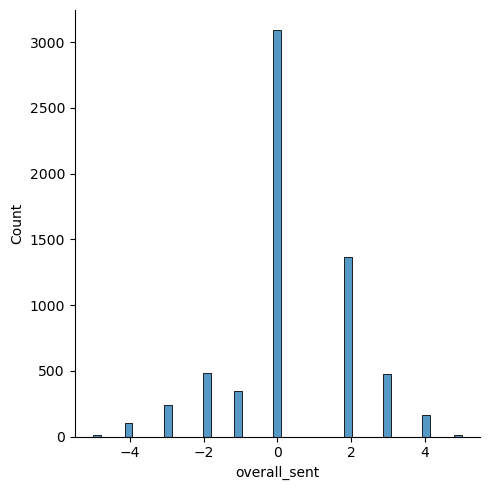

In [86]:
# IV=countinuous
sns.displot(x = 'overall_sent', data=merged)

The histogram represents the distribution of 'overall sent', where the majority of sentiments are 0, which indicates neutral sentiment, and approximately half of the tweets in this dataset are neutral.

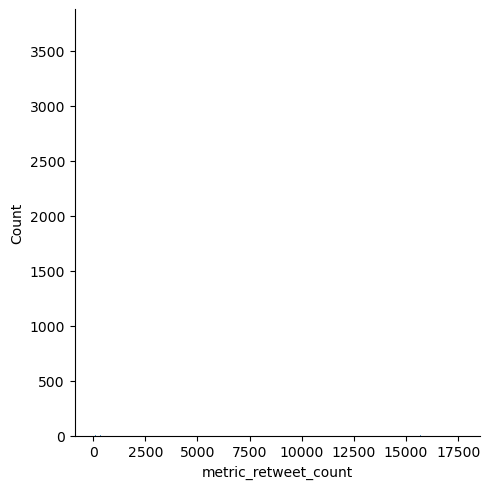

In [87]:
# DV=countinuous
sns.displot(x = 'metric_retweet_count', data = merged)

This is not at all informative, so I will eliminate outliers, as these extreme cases are not relevant to my research objectives. This will be accomplished by slicing my data. First, I must examine the data descriptors for'metric retweet count'

In [88]:
merged['metric_retweet_count'].describe()

count    6297.000
mean      131.565
std       863.357
min         0.000
25%         0.000
50%         0.000
75%         5.000
max     17661.000
Name: metric_retweet_count, dtype: float64

The high standard deviation indicates that the number of retweets varied greatly. 75% of the observations have a value that is equal to or less than 5, whereas the greatest value seen is 17661. So I will slice my data and just display the amount of retweets below 100.

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='metric_retweet_count', ylabel='Density'>

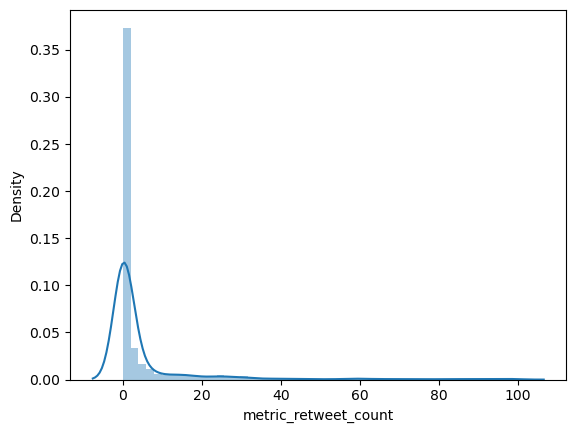

In [89]:
sns.distplot(merged[merged['metric_retweet_count']<100]['metric_retweet_count'])

**Visualization of key bivariate relationships**

<AxesSubplot:xlabel='overall_sent', ylabel='metric_retweet_count'>

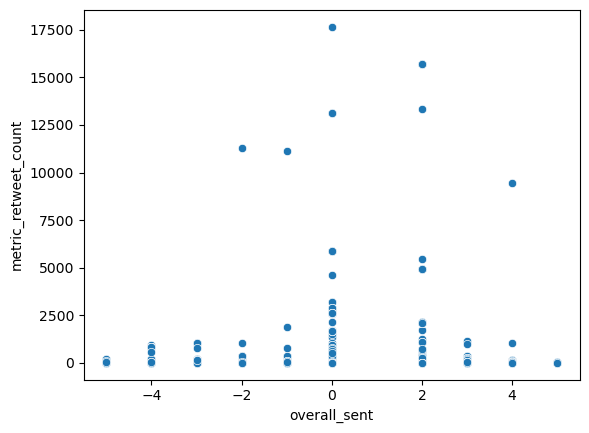

In [90]:
sns.scatterplot( x='overall_sent', y='metric_retweet_count', data=merged )

It seems that tweets with neutral sentiment are being retweeted the most.

## Data Exploration & Evaluation
This analysis employs a merged dataset that incorporates all relevant variables required for further analysis. The independent variable in this study is the overall sentiment score of tweets, which is a composite variable that combines the positive, neutral, and negative sentiment scores of each tweet. This variable ranges from -5 to 5, with higher scores indicating a more favorable attitude. The dataset's mean score is 0.382, with a standard deviation of 1.7.

This analysis focuses on the number of retweets, which serves as an indicator of a tweet's popularity and virality. The dependent variable ranges continuously from 0 to 17661, with an average of 131.565. However, the standard deviation of 863.357 indicates that a small proportion of tweets have an overwhelmingly high number of retweets, contributing to data imbalance. In fact, 75% of the tweets have a value of 5 or less, while the highest recorded value is 17661.

It's worth noting that a similarly high standard deviation of 238959.125 is observed for the control variable "metric followers count," with 75% of users have more than 5497 followers. This data imbalance could also potentially skew the results of the analysis.

The process of data selection is subject to a certain degree of bias, as it is often difficult to predict or control the timing of data collection in relation to external factors such as promotional offerings by Amazon. Consequently, current data sets contains a disproportionately large number of promotional tweets, with nearly one quarter of the tweets related to promotions. This presents a potential challenge for analyzing data in a  unbiased manner, as the presence of promotional tweets may have a huge impact on the results.


To ensure the accuracy of the sentiment score coding, inter-coder reliability was assessed using the Krippendorff's alpha reliability test. The test revealed a poor reliability score of -0.095, indicating that there was less agreement than expected by chance between the human coder's sentiment score and the SentiStrength program. Therefore, additional research is required to identify the sources of disagreement and determine the optimal method for improving the coding scheme's reliability.

Furthermore, after analyzing the dataset's visualizations, it was discovered that nearly half of the tweets in the dataset had a neutral sentiment score, and neutral tweets were retweeted more frequently than positive or negative tweets. Therefore, it is possible that the evidence does not support Hypothesis 1, which proposes that the likelihood of a tweet being retweeted increases as the sentiment score decreases.

In conclusion, the results of this analysis suggest that the sentiment score of a tweet may not be the sole factor driving its retweetability. 



## Modeling and Hypothesis Testing 

After understanding and preparing the data, you are ready to do the modeling. It is important to explain to the reader:
* Explaining which models will be used, and why
* If appropriate, explaining which strategy you are using to fine tune or improve the model
* Discussion about the model evaluation (i.e., why you believe the model is a good model) and, if appropriate, comparison between different models
* After the appropriate model is identified, then the hypothesis can be tested. You can then report the result of the tests being used to test the hypothesis (as discussed in the criteria for the assignment), explaining to the reader how the test is being made and what the results of the testing mean for the hypothesis at hand. 
* Visualizations (as appropriate) are helpful to explain to the reader what has been found.
* Usage of the model to make predictions (e.g., key audience segments)
* Reviewing the model to indicate which features (variables) are responsible for the predictions (related to Explainable AI discussions)

**IMPORTANT:**
* We consider as different models both when different features/variables are being tested (to achieve the same objective), or when different algorithms are being tested (with the same features/IVs)
* It is important to explain to the reader what the model contains/is, and also how it is being evaluated. When the evaluation is done, it is also important to discuss what the result means in the current context
* As the focus of this course is on predictive analytics, it is expected that predictions are made (using scikit-learn) and discussed after a hypothesis is tested. This means that when ANOVAs or T-Tests are used (as statistical testing), and equivalent OLS/Linear Regression Model (in scikit-learn) needs to be used to make predictions. All tests need to be done in Python, using statsmodels and/or scikit-learn.

## Hypothesis testing with linear regression model with the DV being continuous

In [91]:
from sklearn.linear_model import LinearRegression
# I need linear regression which is from scikit-learn, because I wanna do machine-learning afterwards
import statsmodels.api as sm
# I need stats model
import numpy as np
# import numpy to use lime
import lime
from lime import lime_tabular
#however there is a debate about using lime since it still under development and does not work in all the systems

In [92]:
linear_stats_retweets = sm.OLS(merged['metric_retweet_count'], 
                                 sm.add_constant(merged[['overall_sent','metric_followers_count','promotion']]))

The linear regression model has 'metric_retweet_count' as depedent variable and 'overall_sent','metric_followers_count','promotion' as predictors

In [93]:
retweet_results=linear_stats_retweets.fit()

the model has been fitted to the data.

In [94]:
retweet_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     metric_retweet_count   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     5.023
Date:                  Sat, 25 Mar 2023   Prob (F-statistic):            0.00177
Time:                          19:18:01   Log-Likelihood:                -51500.
No. Observations:                  6297   AIC:                         1.030e+05
Df Residuals:                      6293   BIC:                         1.030e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    107.8710     12.558      8.590      0.000      83.254     132.488
overall_sent              10.4142      6.401      1.627      0.104      -2.134      22.962
metric_followers_count -2.031e-05   4.55e-05     -0.446      0.655      -0.000    6.89e-05
promotion                 88.8574     26.051      3.411      0.001      37.788     139.927
==============================================================================
Omnibus:                    10709.493   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8130080.303
Skew:                          11.808   Prob(JB):                         0.00
Kurtosis:                     177.438   Cond. No.                     5.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An ordinary least squares (OLS) regression analysis was conducted to examine the relationship between retweet count (metric_retweet_count) and overall sentiment score (overall_sent), controlling for number of followers (metric_followers_count) and promotion. The sample consisted of 6,297 observations. The overall model was statistically significant, F(3, 6293) = 5.02, p = .002, and accounted for a small but significant amount of the variance in retweet count, R2 = .00. Of the three predictor variables, only promotion (β = 88.86, t = 3.411, p = .001, 95% CI [37.79, 139.93]) was found to have a significant relationship with retweet count. The regression coefficient for overall sentiment score (β = 10.41, t = 1.627, p > .05, 95% CI [-2.13, 22.96]) and number of followers (β = 0.00, t = -0.446, p > .05, 95% CI [-0.00, 6.89]) were not statistically significant.

This means hypothesis that proposes the likelihood of a tweet being retweeted increases as the sentiment score decreases is not supported. Moreover,control variable promotion had a significant positive relationship with retweet count, while overall sentiment score and number of followers were not significantly related to retweet count. Specifically, the regression coefficient for promotion indicates that for each unit increase in promotion, retweet count increased by 88.86 units on average. The small R2 value indicates that the model accounts for only a small amount of the variance in retweet count. It is important to note that while the results were statistically significant, the effect size for promotion was relatively small, suggesting that other factors beyond those included in the model may also play a role in predicting retweet count.

## Result visualization

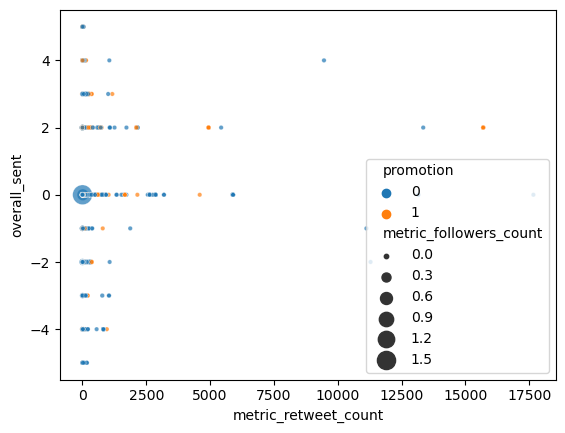

In [95]:
import matplotlib.pyplot as plt

# Create scatterplot
sns.scatterplot(data=merged, x='metric_retweet_count', y='overall_sent', hue='promotion',
                size='metric_followers_count', sizes=(10, 200), alpha=0.7)

# Add axis labels
plt.xlabel('metric_retweet_count')
plt.ylabel('overall_sent')

# Show the plot
plt.show()

In this code, dataframe 'merged' was used which contains all variables of interest. The x and y parameters specify the independent and dependent variables, respectively. The hue parameter is used to add a third categorical variable, promotion, which is a binary variable. The size parameter is used to add a fourth continuous variable, metric_followers_count, to the plot. The sizes parameter is used to set the range of sizes for the points in the scatterplot. Finally, the alpha parameter is used to set the transparency of the points in the scatterplot.

In [96]:
ols_clf = LinearRegression( fit_intercept = True)

In [97]:
ols_clf.fit(merged[['overall_sent','metric_followers_count','promotion']], merged['metric_retweet_count'])

LinearRegression()

This indicates the model fits

In [98]:
ols_clf.predict([[0,0,0]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.87101867])

According to the stats model 'constant,' the tweet may have 108 retweets.

In [99]:
ols_clf.predict([[1,0,0]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118.28518029])

If a tweet contains sentiment, it may receive 118 retweets. This differs from the stats model above, which indicates 10.41, because it includes the constent value of intercept 107.87.

In [100]:
ols_clf.predict([[0,1,0]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.87099836])

In the statistical model, -2.031e-05 equals -0.00002031, a very small value. As a result, the number of followers has almost no effect on retweetability.

In [101]:
ols_clf.predict([[0,0,1]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([196.728451])

According to the model, the control variable 'promotion' has a significant influence on the number of retweets, which can reach 198 if the tweet is about promotion.

### Using LIME for Explainable AI

In [102]:
data_lime_retweet = merged[['overall_sent','metric_followers_count','promotion','metric_retweet_count' ]]

Selecting the information needed for LIME. X are the features (independent variable and control vriables), y is the target (dependent variable).

In [103]:
class_names_retweet = data_lime_retweet.columns
X_data_lime_retweet = data_lime_retweet[['overall_sent','metric_followers_count','promotion']].to_numpy()
y_data_lime_retweet = data_lime_retweet['metric_retweet_count'].to_numpy()

Creating the LIME explainer

In [104]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_data_lime_retweet, 
    feature_names=class_names_retweet, 
    class_names=['metric_retweet_count'], 
    verbose=True, 
    mode='regression',
    discretize_continuous=True)

In [105]:
exp = explainer.explain_instance(np.array([1,1,1]), ols_clf.predict)
exp.show_in_notebook(show_table=True)

Intercept 100.09639999956767
Prediction_local [217.41929128]
Right: 207.14259231497977


/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The first line is creating an "explainer" and using it to explain how the model came to a prediction for a certain input. The input is [1,1,1] which  represents 'overall_sent','metric_followers_count','promotion'used to make a prediction.

The second line is displaying the explanation in a notebook. It includes the intercept value (which is the starting value of the predicted output), the prediction_local is final predicted value (216.87) based on the input variables and the "right" value which is the actual value oberserved (207.147).

The middle graph displays the variables that were used to make the prediction and their corresponding weights. It shows that the "promotion" feature has a positive value of 88.30, which indicates a strong positive effect on the likelihood of being retweeted. This means that tweets with higher promotion values are more likely to be retweeted.

Another feature, "overall_sent," has a value of 26.24 for this instance, meaning it contributes 26.24 to the predicted likelihood of being retweeted. This suggests that increasing the overall sentiment value would result in a proportional increase in the predicted value of being retweeted by 26.24.

Lastly, the "metric_followers_count" feature has a very small positive effect, with a value of 2.38. This suggests that the number of followers has only a minor impact on the predicted likelihood of being retweeted.


## Modeling and model comparison

In [106]:
#split in train and test
from sklearn.model_selection import train_test_split

In [107]:
train,test= train_test_split(merged,test_size=0.2, random_state=42)

In [108]:
train.head()

,id,text,negative,positive,neutral,metric_retweet_count,metric_followers_count,level_0,pseudID,overall_sent,promotion
6053,1622957075369275396,🛒 Discount: 25% off\n📦 Raven Pro Document Scan...,-1,1,0,0,17201,5009,9962,0,1
5674,1622957638853222409,"""Blood Atonement"" is free with Kindle Unlimite...",-1,2,1,0,31,17204,43261,2,0
505,1622964699720564736,Bolzano's Philosophy of Grounding: Translation...,-1,1,0,0,10,2432,4098,0,0
4564,1622958927557144576,Calvin Klein Women's XS-XL Modern Cotton Thong...,-1,1,0,0,0,3389,6198,0,0
272,1622965059772096513,Genshin Impact: Official Art Book Vol. 1\nPreo...,-1,1,0,0,863,1440,2099,0,0


In [109]:
len(train)

5037

In [110]:
test.head()

,id,text,negative,positive,neutral,metric_retweet_count,metric_followers_count,level_0,pseudID,overall_sent,promotion
1840,1622962595152920576,RT @mention Hidden In Childhood is a #1 best s...,-1,3,1,7,2229,7278,15572,3,0
3139,1622960857788416001,Saturn I/Ib Rocket: Nasa's First Apollo Launch...,-1,1,0,0,13,11163,25563,0,1
3649,1622960329738313732,@mention @mention Superb superb\n#iQOO11\n@men...,-1,1,0,0,62,438,506,0,1
2330,1622961838601404417,✅✅✅Welcome everyone special program\nStart dat...,-1,2,1,0,259,249,269,2,0
3599,1622960398390665217,(US)ZOTAC RTX 4090 Trinity - Other Seller - $1...,-1,1,0,0,15294,36,36,0,0


In [111]:
len(test)

1260

In [112]:
len(merged), len(train), len(test), len(train) / len(merged), len(test) / len(merged)

(6297, 5037, 1260, 0.7999047165316817, 0.20009528346831826)

The above shows that my expected size datasets were produced after the split.

In [113]:
features = ['overall_sent']

In [114]:
features_controls=['overall_sent','metric_followers_count','promotion']

In [115]:
target = 'metric_retweet_count'

**Predicting with only IV**

In [116]:
ols_clf.fit(train[features], train[target])

LinearRegression()

In [117]:
ols_clf.predict([[1]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([146.54644075])

In [118]:
ols_clf.predict([[0]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([133.68457741])

The number of predicted retweets (146) is larger when sentiment is present as an input than when it is absent (133)

**Predicting with control variables**

In [119]:
ols_clf_control = LinearRegression( fit_intercept = True)

In [120]:
ols_clf_control .fit(train[features_controls], train[target])

LinearRegression()

In [121]:
ols_clf_control.predict([[0,0,0]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([113.88075231])

In [122]:
ols_clf_control.predict([[1,1,1]])

/Users/shi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215.61780239])

**Prediction model with only IV**

In [123]:
retweet_stat_ivs=sm.OLS(train['metric_retweet_count'], sm.add_constant(train[['overall_sent']]))

In [124]:
retweet_stat_ivs=retweet_stat_ivs.fit()

In [125]:
retweet_stat_ivs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     metric_retweet_count   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     2.968
Date:                  Sat, 25 Mar 2023   Prob (F-statistic):             0.0850
Time:                          19:18:02   Log-Likelihood:                -41428.
No. Observations:                  5037   AIC:                         8.286e+04
Df Residuals:                      5035   BIC:                         8.287e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          133.6846     13.032     10.258      0.000     108.135     159.234
overall_sent    12.8619      7.465      1.723      0.085      -1.773      27.497
==============================================================================
Omnibus:                     8440.344   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5646105.622
Skew:                          11.453   Prob(JB):                         0.00
Kurtosis:                     165.412   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Prediction model with controls**

In [126]:
reweet_stat_controls=sm.OLS(train['metric_retweet_count'],
                                sm.add_constant(train [['overall_sent','metric_followers_count','promotion']]))

In [127]:
reweet_stat_controls=reweet_stat_controls.fit()

Model fits

In [128]:
reweet_stat_controls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     metric_retweet_count   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     3.966
Date:                  Sat, 25 Mar 2023   Prob (F-statistic):            0.00779
Time:                          19:18:02   Log-Likelihood:                -41424.
No. Observations:                  5037   AIC:                         8.286e+04
Df Residuals:                      5033   BIC:                         8.288e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    113.8808     14.702      7.746      0.000      85.059     142.703
overall_sent              11.7813      7.469      1.577      0.115      -2.861      26.424
metric_followers_count -1.749e-05   4.79e-05     -0.365      0.715      -0.000    7.63e-05
promotion                 89.9557     30.375      2.962      0.003      30.408     149.504
==============================================================================
Omnibus:                     8433.764   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5611885.178
Skew:                          11.437   Prob(JB):                         0.00
Kurtosis:                     164.914   Cond. No.                     6.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistical model that included only the independent variable (IV) was not significant (p > .05) and had a weaker predictive power compared to the statistical model that included control variables, as indicated by the R-squared values of 0.001 and 0.002, respectively. Despite the weak R-squared value, the statistical model that included control variables was significant, indicating that it provides a better fit to the data than the model without controls. Therefore, the statistical model with control variables is recommended as it better accounts for the variance in the dependent variable.

Below are descriptive overviews of the two models.

In [129]:
test['predicted_rewteet_features'] = ols_clf.predict(test[features])

In [130]:
test['predicted_rewteet_features'].describe()

count   1260.000
mean     138.911
std       21.616
min       69.375
25%      133.685
50%      133.685
75%      159.408
max      197.994
Name: predicted_rewteet_features, dtype: float64

It makes more sense to use discribe than value counts considering the conintuous nature of the dependednt variable

In [131]:
test['predicted_rewteet_features_controls'] = ols_clf_control.predict(test[features_controls])

In [132]:
test['predicted_rewteet_features_controls'].describe()

count   1260.000
mean     137.868
std       42.735
min       54.504
25%      113.854
50%      113.881
75%      149.223
max      262.630
Name: predicted_rewteet_features_controls, dtype: float64

## Evaluation

**This section provides the answer to the communication challenge, discussing the results (hypothesis testing) in order to answer the general RQ. Creativity in how to summarize the findings (including visualizations) is a plus.**

**This section also provides a set of implications (i.e., now that we know the answer to the RQ, what does it mean for the organization/process/challenge? what should the organization do?)**

The current study aimed to investigate the relationship between the sentiment of tweets and their retweetability, and to explore the factors that influence the likelihood of a tweet being retweeted on Twitter. The results of the regression analysis indicated that the hypothesis that the likelihood of a tweet being retweeted increases as the sentiment score decreases is not supported by the data. In other words, positive sentiment does not necessarily increase retweetability, nor does negative sentiment decrease it.

The analysis revealed that promotion-related tweets are associated with higher retweet counts, indicating that promotional content is more likely to be shared among Twitter users than other types of content. However, the model's small R2 value suggests that the analysis only accounts for a small portion of the variance in retweet counts. Surprisingly, having more followers does not necessarily result in more retweets, contrary to expectations.

![image](result_visual.png)

**Figure 1: result visualization**

**(note: the code for of the result visualization is provided above under the 'result visualization' section.)

These results have significant implications for Amazon's social media management and monitoring on Twitter. Firstly, the findings indicate that neither positive nor negative electronic word-of-mouth (eWOM) in the form of (re)tweets influences the likelihood of it being spread to more people. Therefore, there is no strong evidence that negative sentiment or sentiment in general will become systematically viral on Twitter and pose a threat to Amazon's media reputation.

Although the analysis found that sentiment did not have a significant effect on retweetability, it is still important for Amazon to monitor sentiment trends on social media. This can help the company identify potential issues or concerns that customers may have and respond to them in a timely and appropriate manner. It can also help the company identify opportunities to improve its products or services based on customer feedback.


The fact that promotion-related tweets are associated with higher retweet counts suggests that Amazon should consider including more promotional content in their social media strategy. By doing so, they may increase the likelihood that their content will be shared among Twitter users, which can help to increase brand awareness and drive sales. 

In addition, Amazon may consider diversifying its tweets beyond the 'promotion' theme. For instance, in addition to promotional tweets, the company could post tweets that are informative, educational, or entertaining. This has the potential to raise the level of engagement with followers, which in turn may increase the number of retweets.

However, it is essential to note that the model only accounts for a small portion of the variance in retweet counts, and there may be other factors that influence the likelihood of a tweet being retweeted on Twitter. Therefore, Amazon should continue to monitor and analyze their social media activity on Twitter to identify and understand these factors and adjust their social media strategy accordingly.

In conclusion, this research provides new insights into the retweetability of tweets and has real-world applications for Amazon's handling of its social media presence on Twitter. Taking these results into account and continuing to monitor Twitter social media activity, Amazon can boost brand recognition and positive eWOM. 

## Limitations and Next Steps

**In this section you should discuss all the relevant limitations. This includes the limitations of the analysis and of the data, thus consolidating and extending the discussion already included in the earlier sections (e.g., Data Collection, Data Exploration and Modelling), and what do these limitations mean to the conclusions and to the overall challenge.**

**In other words, make sure that you are at least covering:**

***The dataset(s) itself, including how the data collection may have created limitations**

***Limitations associated with the decisions taken during the data understanding & preparation**

***Limitations about the model and hypothesis testing (including fit, selection of variables)**

***Alternative interpretations to the findings**

***You need also to suggest next steps/actions to overcome the most important limitations (as indicated in the assignment criteria).**

This section discusses the limitations of the study, including data limitations, decisions regarding data comprehension and preparation, and model and hypothesis testing limitations. Alternative interpretations will also be considered, and solutions to the most significant limitations will be proposed.

First, using SentiStrength to evaluate the sentiment of the independent variable may compromise the internal validity of the study.Thelwall et al., (2012) state that sentiment analysis arbitrarily assigns a weight or valence to each word within a tweet, regardless of its context. A tweet may contain the word "love," which carries a positive sentiment weight of 4, but it refers implies a neutral sentiment as it is the title of a book. Limited Twitter API access may also affect sentiment analysis accuracy because human coders may not be able to see the full tweet text to assign accurate sentiment score.

The study's second limitation lies in the unbalanced nature of the data. Most tweets receive only a few retweets, and a few receive a disproportionate number. This imbalance could distort the analysis, as shown by the standard deviation of 863.357 for 75% of tweets having a value of 5 or less. Similarly, the control variable "metric followers count" shows a similar imbalance, with 75% of users having over 5497 followers and a standard deviation of 238959.125. An unbalanced dataset could undermine the analysis's reliability.

Thirdly, there is a limitation on the use of NLP-related techniques to generate the controlled categorical variable "promotion." In light of the fact that it is up to the researcher to determine which keywords in a tweet serve as indicators of promotional intent. Promotional tweets containing only the product name maybe be ignored. Additionally, some users may inadvertently use such terms, which may be misrepresented as promotions.

With an R-square of 0.002, the prediction model is statistically significant but weak. This indicates that the model cannot account for a substantial portion of the variance in the data and that other variables may influence the dependent variable. Different interpretations of the results must be considered. For example, the fact that promotional tweets make up a disproportionately large portion of the data set might suggest that people prefer to retweet these messages. Consequently, it is possible that other factors are more important than the model's predictability in determining the likelihood that a tweet will be retweeted.

Future research may investigate non-linear modeling methods to improve model prediction in order to address these limitations. Using more complex models, such as decision trees, may capture nonlinear relationships between variables more accurately. In addition, examining additional independent variables beyond sentiment, follower count, and promotion may result in a more comprehensive understanding of the factors that affect the retweetability of tweets.

## Ethical and Normative Considerations

**This section should discuss the considerations the organization needs to have. Are there ethical or more general normative aspects that need to be taken into account? Drawing directly from the literature discussed in class (and other literature), what should readers of the data analysis be mindful about? Make sure to cite the relevant literature.**

**This discussion can relate to the actual dataset/analysis that was done, to the recommendations/implications, and to the action plan suggested in the previous sections.**

Incorporating Twitter data into social media monitoring or media reputation management can raise ethical concerns for Amazon. To prevent potential violations of user privacy, Amazon must be careful when using data gathered from Twitter for political or commercial purposes. By conducting sentiment analysis of Twitter data, Amazon can gain insights into users' preferences and impressions from their tweets. This information can then be used by Amazon and other companies to create personalized prediction products that anticipate users' future behavior (Zuboff, 2020). However, if this data is used without the user's knowledge or consent, it could be considered a breach of their privacy. In particular, third parties may use this information to target users with targeted advertising or other content designed to sway their decisions. (Saltz & Dewar, 2019).

It is crucial for individuals to be aware of the potential repercussions of utilizing old data sets for new purposes, as data can now be manipulated in ways that were unforeseeable to the original data creators (Tucker, 2019). In Amazon's case, there is a possibility that their actions could have unintended outcomes that could harm both individuals and society as a whole. For instance, if their analysis indicates that tweets with negative sentiments or promotional content are more likely to become viral, individuals or organizations might attempt to manipulate tweet content to increase their popularity and gain attention. Overusing negative content or false promotions could result in a surge of misinformation with unpredictable consequences for individuals' ability to make informed decisions and the overall positive climate of information sharing in society (Jahng et al., 2020; Kozyreva et al., 2020).

Consider these ethical and normative issues when assessing the previous sections' recommendations and action plan. The company should make sure it operates in a way that is ethical and considerate of people's personal space and societal norms.


## References

If you use scientific papers, cite them using APA style (and add a reference section at the end). If you are using pieces of code written by someone else, add a comment in the appropriate section and add a link to the source.

Regarding the tools we used:
* Sentiment analysis was done using SentiStrength. The following paper can be cited:
    * Thelwall, M., Buckley, K., Paltoglou, G., Cai, D., & Kappas, A. (2010). Sentiment strength detection in short informal text. *Journal of the American Society for Information Science and Technology*, 61(12), 2544-2558.

* Tweets were collected using DMI-TCAT. The following paper can be cited:
    * Borra, E., & Rieder, B. (2014). Programmed method: developing a toolset for capturing and analyzing tweets. *Aslib Journal of Information Management*, 66(3), 262-278.



Araujo, T., & van der Meer, T. G. (2020). News values on social media: Exploring what drives peaks in user activity about organizations on Twitter. *Journalism*, 21(5), 633-651

Barsade, S. G. (2002). The ripple effect: Emotional contagion and its influence on group behavior. *Administrative Science Quarterly*, 47(4), 644-675.

Etter, M., Ravasi, D., & Colleoni, E. (2019). Social media and the formation of organizational reputation. *Academy of Management Review*, 44(1), 28-52.

Galtung, J. & Ruge, M. (1965). The structure of foreign news: The presentation of the Congo, Cuba and Cyprus crises in four
foreign newspapers. *Journal of International Peace Research*, 1, 64- 90.

Jahng, M. R., Lee, H., & Rochadiat, A. (2020). Public relations practitioners’ management of fake news: Exploring key elements and acts of information authentication. *Public Relations Review*, 46(2), 101907.

Kozyreva, A., Lewandowsky, S., & Hertwig, R. (2020). Citizens Versus the Internet: Confronting Digital Challenges With Cognitive Tools. Psychological Science in the Public Interest: A Journal of the American Psychological Society, 21(3), 103–156

Park, C., & Lee, T. M. (2009). Information direction, website reputation and eWOM effect: A moderating role of product type. *Journal of Business Research*, 62(1), 61-67.

Possler, D., Bruns, S., & Niemann-Lenz, J. (2019). Data Is the New Oil--But How Do We Drill It? Pathways to Access and Acquire Large Data Sets in Communication Science. *International Journal of Communication*, 13, 3894–3911. 

Saltz, J. S., & Dewar, N. (2019). Data science ethical considerations: A systematic literature review and proposed project framework. *Ethics and Information Technology*, 21(3), 197–208

Thelwall, M., Buckley, K., & Paltoglou, G. (2012). Sentiment strength detection for the social web. *Journal of the American Society for Information Science and Technology*, 63(1), 163-173.

Tucker, C. (2019). Privacy, Algorithms, and Artiﬁcial Intelligence. In A. Agrawal, J. Gans, & A. Goldfarb (Eds.), The Economics of Artificial Intelligence: An Agenda (pp. 423–437). *University of Chicago Press*.

Vaish, A., Grossmann, T., & Woodward, A. (2008). Not all emotions are created equal: the negativity bias in social-emotional development. *Psychological Bulletin*, 134(3), 383.

Zuboff, S. (2020). Caveat Usor: Surveillance capitalism as epistemic inequality. Zuboff,Shoshana," Caveat Usor: Surveillance Capitalism as Epistemic Inequality," in Kevin Werbach ed., After the Digital Tornado, *Cambridge University Press*, Cambridge. 


